# 1. Read and inspect

In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
# % 28236 1574 1574
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


# 2. Matrices

## 2.1. Adjacency matrix

In [3]:
n = np.max(data['to'])
ad_mat = np.zeros((n,n))
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = ad_mat[row['from']-1, row['to']-1] + 1
    ad_mat[row['from']-1, row['to']-1] = 1

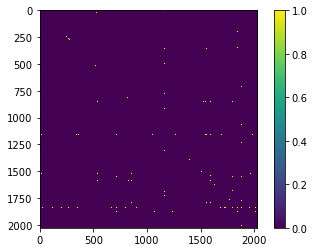

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.imshow(ad_mat);
plt.colorbar()
plt.show()

Self directed nodes

In [4]:
np.sum(np.diag(ad_mat))

81.0

We discard them.

In [5]:
np.fill_diagonal(ad_mat,0)
np.fill_diagonal(A,0)

## 2.2. Laplacian matrix

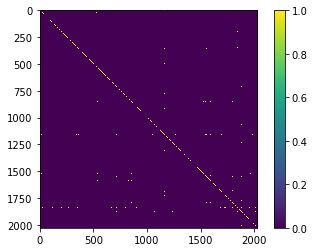

In [6]:
L = np.zeros((n,n))

deg_vec = np.dot(A,np.ones(n))

L = np.diag(deg_vec) - A

plt.imshow(np.abs(L) > 0);
plt.colorbar()
plt.show()

## 2.3 Eigendecomposition of the Laplacian

In [7]:
#w,v = np.linalg.eig(ad_mat_weight)
w_lap, v_lap = np.linalg.eig(L)

In [8]:
print(w_lap)
print(v_lap)
print('There are ', np.sum(w_lap==0), ' connected components')
print(np.max(w_lap))

[ 2.+0.j  2.+0.j  1.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
[[  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    3.68694448e-06+0.j   1.01089974e-06+0.j   7.40863025e-03+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    6.46895294e-05+0.j   8.65378230e-06+0.j   6.76238494e-06+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 ..., 
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    3.74627549e-05+0.j   8.52298714e-06+0.j   8.68278452e-06+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    3.21189943e-05+0.j   2.62827973e-05+0.j   8.66149299e-06+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   9.99557643e-01+0.j]]
There are  963  connected components
(512.09243975+0j)


# 3 Local Characterizations

## 3.1 Degree (in and out)

In [9]:
#Microscale
Degree_out = np.zeros(n)
Degree_in = np.zeros(n)
for i in range(0,n):
    Degree_in[i] = np.sum(A[i,:]) 
    Degree_out[i] = np.sum(A[:,i]) 

print('Out-degree', Degree_out)
print('In-degree', Degree_in)
print('Out-degree sum', np.sum(Degree_out))
print('In-degree sum',np.sum(Degree_in))

Out-degree [ 29.   2.   1. ...,  37.   2.   1.]
In-degree [ 135.    1.    0. ...,   35.    2.    0.]
Out-degree sum 8679.0
In-degree sum 8679.0


## 3.2 Centrality

In [10]:
import networkx as nx

In [11]:
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

### 3.2.1 Degree Centrality

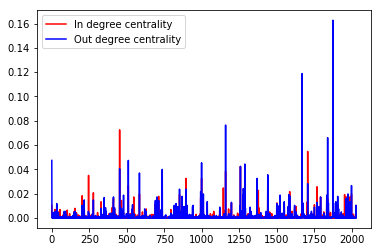

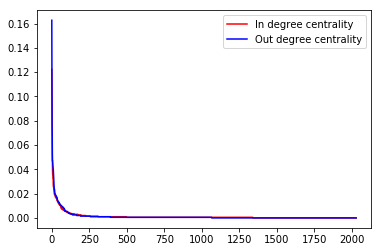

In [27]:
in_deg_cen = nx.in_degree_centrality(G)
out_deg_cen = nx.out_degree_centrality(G)

lists_in = sorted(in_deg_cen.items()) # sorted by key, return a list of tuples
lists_out = sorted(out_deg_cen.items()) # sorted by key, return a list of tuples

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
x_out, y_out = zip(*lists_out)
in_, = plt.plot(x_in, y_in, 'red')
out_, = plt.plot(x_out, y_out, 'blue') 
plt.legend([in_, out_],['In degree centrality', 'Out degree centrality'])

plt.show()

lists_in = sorted(in_deg_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
in_, = plt.plot(y_in, 'red')

lists_out = sorted(out_deg_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x_out, y_out = zip(*lists_out) # unpack a list of pairs into two tuples
out_, = plt.plot(y_out, 'blue')
plt.legend([in_, out_],['In degree centrality', 'Out degree centrality'])
plt.show()

#### 3.2.1.1 In degree histogram

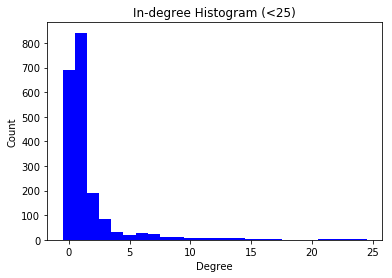

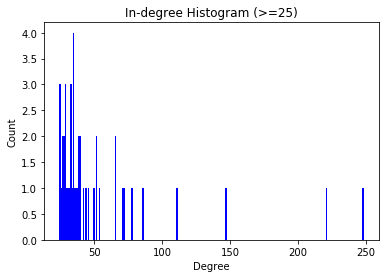

In [13]:
import collections

degree_sequence_1 = sorted([d for n, d in G.in_degree_iter() if d<25], reverse=True)  # degree sequence
degree_sequence_2 = sorted([d for n, d in G.in_degree_iter() if d>=25], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence_1)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
w = 1
#deg = deg[deg[1]<100]
plt.bar(deg, cnt, width=w, color='b')

plt.title("In-degree Histogram (<25)")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

degreeCount = collections.Counter(degree_sequence_2)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
w = 1
#deg = deg[deg[1]<100]
plt.bar(deg, cnt, width=w, color='b')

plt.title("In-degree Histogram (>=25)")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

#### 3.2.1.2 Out degree histogram

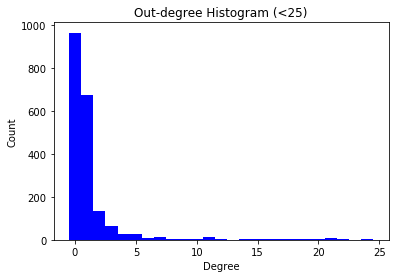

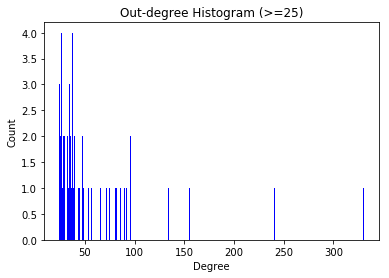

In [14]:
import collections

degree_sequence_1 = sorted([d for n, d in G.out_degree_iter() if d<25], reverse=True)  # degree sequence
degree_sequence_2 = sorted([d for n, d in G.out_degree_iter() if d>=25], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence_1)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
w = 1
#deg = deg[deg[1]<100]
plt.bar(deg, cnt, width=w, color='b')

plt.title("Out-degree Histogram (<25)")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

degreeCount = collections.Counter(degree_sequence_2)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
w = 1
#deg = deg[deg[1]<100]
plt.bar(deg, cnt, width=w, color='b')

plt.title("Out-degree Histogram (>=25)")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

### 3.2.2 Closeness Centrality

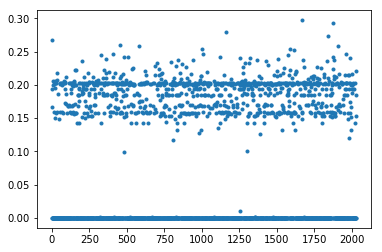

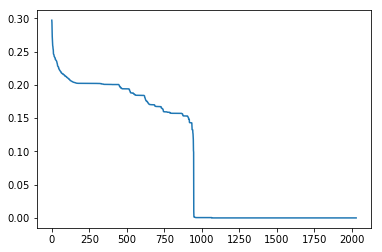

In [15]:
close_cen = nx.closeness_centrality(G)

lists_in = sorted(close_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
plt.plot(x_in, y_in, '.')
plt.show()

plt.plot(y_in)
plt.show()

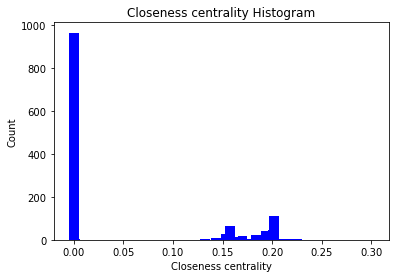

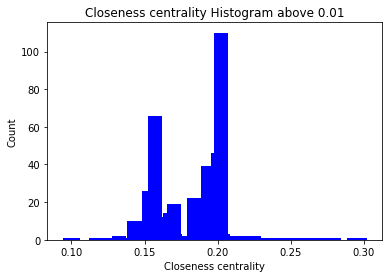

In [16]:
h = {}
for node in close_cen:
    d = close_cen[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1
        
plt.bar(list(h.keys()), h.values(), width=0.01, color='b')

plt.title("Closeness centrality Histogram")
plt.ylabel("Count")
plt.xlabel("Closeness centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

h = {}
for node in close_cen:
    d = close_cen[node]
    if d in h:
        h[d] += 1
    else:
        if d > 0.01:
            h[d]=1
plt.bar(list(h.keys()), h.values(), width=0.01, color='b')

plt.title("Closeness centrality Histogram above 0.01")
plt.ylabel("Count")
plt.xlabel("Closeness centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

### 3.2.3 Eigenvector Centrality

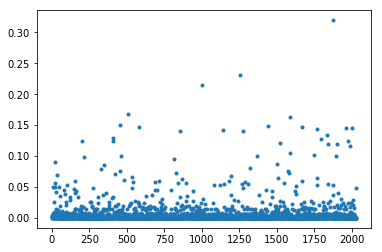

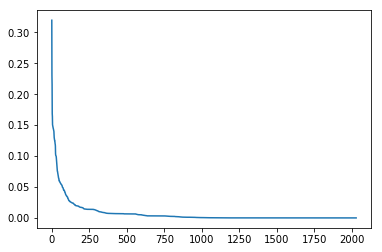

In [17]:
eigen_cen = nx.eigenvector_centrality(G)

lists_in = sorted(eigen_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
plt.plot(x_in, y_in, '.')
plt.show()

plt.plot(y_in)
plt.show()

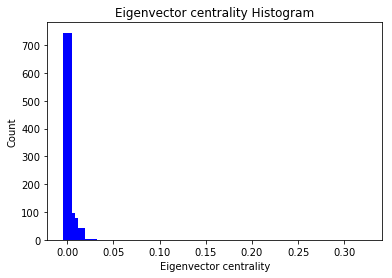

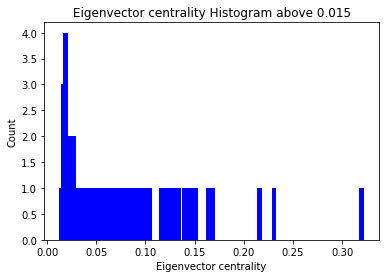

In [18]:
h = {}
for node in eigen_cen:
    d = eigen_cen[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1
        
plt.bar(list(h.keys()), h.values(), width=0.01, color='b')

plt.title("Eigenvector centrality Histogram")
plt.ylabel("Count")
plt.xlabel("Eigenvector centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

h = {}
for node in eigen_cen:
    d = eigen_cen[node]
    if d in h:
        h[d] += 1
    else:
        if d > 0.015:
            h[d]=1
plt.bar(list(h.keys()), h.values(), width=0.005, color='b')

plt.title("Eigenvector centrality Histogram above 0.015")
plt.ylabel("Count")
plt.xlabel("Eigenvector centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

### 3.2.3 Betweenness Centrality

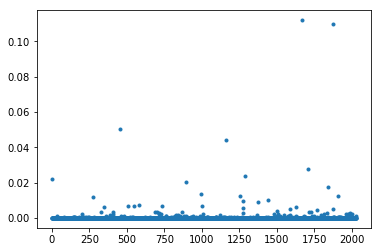

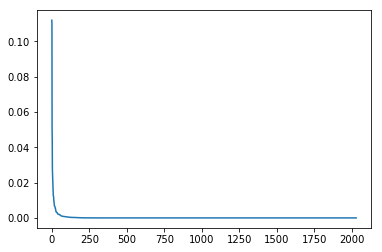

In [19]:
betw_cen = nx.betweenness_centrality(G)

lists_in = sorted(betw_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x_in, y_in = zip(*lists_in) # unpack a list of pairs into two tuples
plt.plot(x_in, y_in, '.')
plt.show()

plt.plot(y_in)
plt.show()

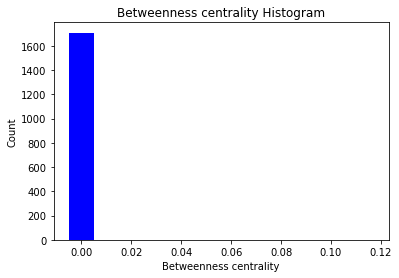

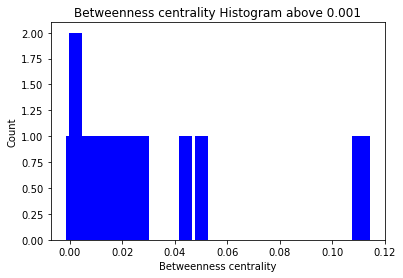

In [24]:
h = {}
for node in betw_cen:
    d = betw_cen[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1
        
plt.bar(list(h.keys()), h.values(), width=0.01, color='b')

plt.title("Betweenness centrality Histogram")
plt.ylabel("Count")
plt.xlabel("Betweenness centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

h = {}
for node in betw_cen:
    d = betw_cen[node]
    if d in h:
        h[d] += 1
    else:
        if d > 0.001:
            h[d]=1
plt.bar(list(h.keys()), h.values(), width=0.005, color='b')

plt.title("Betweenness centrality Histogram above 0.001")
plt.ylabel("Count")
plt.xlabel("Betweenness centrality")
#ax.set_xticks([d + w/2 for d in deg])
#ax.set_xticklabels(deg)

plt.show()